## Using any dataset, calculate TP, TN, FP ,FN and different metrics (Accuracy, Precision, Recall(Sensitivity), F1-Score, MCC, Specificity, Negative Predictive Value) by defining your own functions. Compare your values with scikit-learn's library functions. Get the result of Confusion Matrix using sklearn. Using sklearn, plot the ROC & AUC Curves for your test data and random probabilities. Using sklearn, calculate the AUC of your test data and of random probabilities. Interpret the results. Write the inference/analysis of each output.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.metrics import confusion_matrix, matthews_corrcoef, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()

X = data.data
y = data.targetF1-Score, MCC,

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [4]:
model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test)[:, 1]

In [19]:
# scikit-learn metrics
accuracy = accuracy_score(y_pred=y_pred, y_true=y_test)
precision = precision_score(y_pred=y_pred, y_true=y_test)
recall = recall_score(y_pred=y_pred, y_true=y_test)
cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
mcc = matthews_corrcoef(y_pred=y_pred, y_true=y_test)
f1 = f1_score(y_pred=y_pred, y_true=y_test)

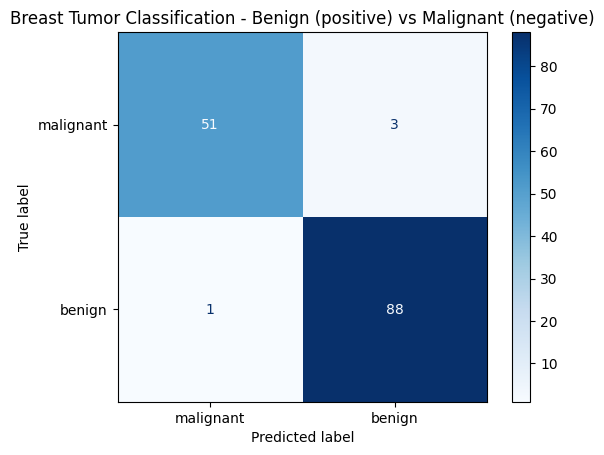

In [20]:
conf = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)

conf.plot(cmap=plt.cm.Blues)
plt.title("Breast Tumor Classification - Benign (positive) vs Malignant (negative)")
plt.show()

In [21]:
tn, fp, fn, tp = cm.ravel()

In [22]:
# precision
f_precision = tp / (tp + fp) 

print(f"precision: {f_precision}, sklearn precision: {precision}")

precision: 0.967032967032967, sklearn precision: 0.967032967032967


In [23]:
# negative predictive value: not present in sklearn
f_npv = tn / (tn + fn)

print(f"negative predictive value: {f_npv}")

negative predictive value: 0.9807692307692307


In [24]:
# recall 
f_recall = tp / (tp + fn)

print(f"recall: {f_recall}, sklearn recall: {recall}")

recall: 0.9887640449438202, sklearn recall: 0.9887640449438202


In [25]:
# specificity : not present in sklearn
f_specificity = tn / (tn + fp)

print(f"specificity: {f_specificity}")

specificity: 0.9444444444444444


In [26]:
# Matthew's Correlation Coefficient
f_mcc = ((tn * tp) - (fn * fp)) / (((tn + fp) * (tn + fn) * (tp + fp) * (tp + fn))) ** 0.5

print(f"MCC: {f_mcc}, sklearn MCC: {mcc}")

MCC: 0.940477037066757, sklearn MCC: 0.940477037066757


In [27]:
# accuracy
f_accuracy = (tp + tn) / (tp + tn + fp + fn)

print(f"accuracy: {f_accuracy}, sklearn accuracy: {accuracy}")

accuracy: 0.972027972027972, sklearn accuracy: 0.972027972027972


In [28]:
# f1 Score 
f_f1 = (2 * f_precision * f_recall) / (f_precision + f_recall)

print(f"f1 score: {f_f1}, sklearn f1 score: {f1}")

f1 score: 0.9777777777777779, sklearn f1 score: 0.9777777777777777


In [32]:
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=y_probs)

random_probs = np.random.uniform(0, 1, size=len(y_pred))
fpr_random, tpr_random, _ = roc_curve(y_true=y_test, y_score=random_probs)

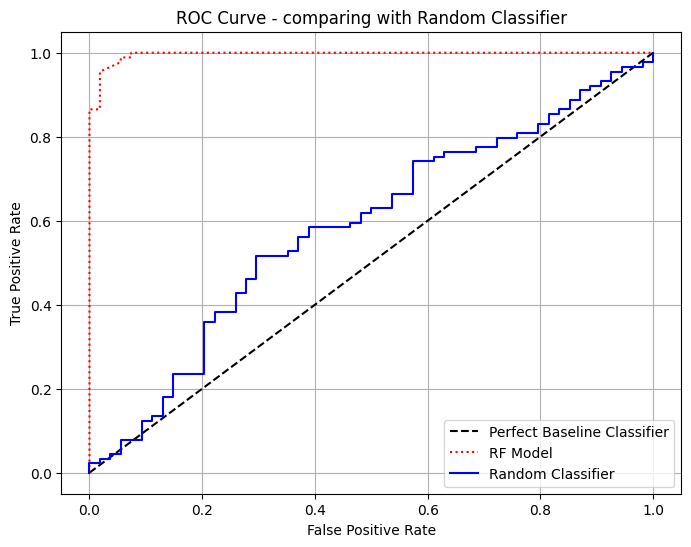

In [38]:
plt.figure(figsize=(8, 6))

plt.plot([0, 1], [0, 1], linestyle="--", color="black", label="Perfect Baseline Classifier")
plt.plot(fpr, tpr, linestyle=":", color="red", label="RF Model")
plt.plot(fpr_random, tpr_random, linestyle="-", color="blue", label="Random Classifier")

plt.title("ROC Curve - comparing with Random Classifier") 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()

In [42]:
roc_auc = roc_auc_score(y_true=y_test, y_score=y_probs)
roc_auc_random = roc_auc_score(y_true=y_test, y_score=random_probs)

print(f"RF Model ROC-AUC Score for positive class: {roc_auc}")
print(f"Random Predictor ROC-AUC Score for positive class: {roc_auc_random}")

RF Model ROC-AUC Score for positive class: 0.996046608406159
Random Predictor ROC-AUC Score for positive class: 0.5842696629213482
